# Deep Reinforcement Learning Overview

Reinforcement Learning: An Introduction
   
2nd Edition Completed Draft, by Richard S. Sutton and Andrew G. Barto
   
http://incompleteideas.net/book/bookdraft2018jan1.pdf

In [4]:
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

# To do:
Building out the policy gradient methods (Done-ish?)

Finish parenthesis stuff (90% done)

Put in links in the notebook

DeepQ Network on car

SimpleQ Matrix on Car

Keras (Pixel)

## The Origins of Reinforcement Learning

When it comes to analyzing the origins of modern Reinforcement Learning, there are three separate starting points that eventually merge to form what we know today: Optimal Control, Trial and Error through Animal Learning, and, less prevalent, Temporal-Difference Methods. First we will be starting with optimal control.

Around the mid-1950s, Richard Bellman and others tackled the problem of "optimal control", described as minimizing a metric of a constantly changing enviroment over time. By combining the system's own state and a value function, optimized for a certain return goal, they were able to create a functional equation, one that is now known as the Bellman equation (Maybe have an explanation of that now?).

This marks the beginning of what we now know as dynamic programming, the process of solving complex problems by breaking them down into subproblems and building upon each smaller solved one. Bellman also is credited with creating the Markovian decision process (MDPs) while Ronald Howard added on to MDPs by making the policy iteration method for them.
 
The next major part is trial and error through animal learning, a practice, that according to American spychologist R. S. Woodworth, goes as far back as the late 1850s. One of the first few to truly recognize the concept of trial-and-error was Edward Thorndike, an American psychologist that worked extensively on comparitive psychology and the learning process. He initially stated what is now know as "The Law of Effect", a law that describes the correlation between reinforcing events and choosing actions. Over time, the theory was adapted to and laid the foundations for many professionals in the field, such as Pavlov and B. F. Skinner. 

(talk about Turing, advancements in analog RL techniques)
In 1948, Alan Turing described a "pleasure-pain system"

However, due to a lot of confusion in the previous decades due to people using the words reinforcement learning and other types of learning (such as perceptual and supervised) as synonyms, there was a period of silence where development in the field proved slow. Although, there were some exceptions to this trend. The terms "reinforcement" and "reinforcement learning" were actually used in scientific literature for the first time. This is also the time period where Minksky's paper "Steps Toward Artificial Intelligence" that talked about the problem of "How  do  you  distribute  credit  for  success  among  the  many  decisions  that  may  have  been involved in producing it?". Many topics in this paper are still relevant today. Some other examples are the system STeLLA by John Andreae and MENACE by Donald Michie.

One person in particular who is attributed to reviving the field is Harry Klopf, who recognized that there were characteristics of "adaptive behavior" that were being fully ignored. The idea he proposed was the drive to reach a goal in the enviroment, to have a clear desired outcome and undesired end. Eventually, this push evolved into the official distinction between supervised and reinforcement learning.

As mentioned previously, this is the third and last part regarding the origins of reinforcement learning: temporal-difference learning. This type of learning can best be described as (). The origins of this concept can be attributed to animal learning psychology, specifically in the idea of secondary reinforcers. A second reinforcer is a stimulus that has been passively associated with with a primary reinforer (example needed) and thus has a similar effect. 

(Sutton work)

In 1989, Chris Watkin's converged the major parts discussed before into developing Q-Learning.


## States and Actions

![alt text](images/states_actions.png)

The first core concept we will cover is the understanding of what states and actions are. Reinforcement learning is a type of machine learning that is agent-oriented; it relies on its enviroment rather than a teacher to achieve its desired goal. This is similar to how humans learn, through the steps of trial and error.

Let's take for example a person learning to navigate a maze. A state can compropise of any crossroad they are met with, an action is defined as a choice/direction they choose to go, and the goal (reward) is defined as them reaching the end of the maze.

As the person navigates the maze, they will naturally discover that some paths are less optimal than others, while some do not ever reach the end. Ideally, over time, they would be able to navigate the most optimal path every time. And this is what we are trying to achieve.

## Markov Decision Process 

Building on top of states and actions is the next step, a Markov Decision Process (MDP). A MDP can be simplified to a tuple containing 5 parts:
   
S - set of states   
A - set of actions   
P - probability that an action *a* at state *s* at time *t* will get to state *s + 1* at time *t + 1*   
R - reward received after moving from state *s* to state *s + 1*   
$\gamma$ - discount factor that can optimize future rewards vs present rewards
   
Each of these play a role in determining a final "policy" $\pi$; a rule that says given a state *s*, action *a* will be taken.

![alt text](images/markov.png)

This is the standard relationship between an Agent and the Enviroment in a MDP. An agent is the one who learns and makes decision while the enviroment is everything outside of the agent. These two variables constantly interact and feed each other data, with the enviroment supplying the agent with rewards and the agent triggering the effects of the enviroment.

*(Not sure if I want to include this or not, talks about why the distribution of S and R is only dependent on the prior state and action values).*
$$p({s',r | s,a}) \doteq P\{S_t = s', R_t = r | S_{s-1} = s , A_{t-1} = a\}$$
   
What this equation states, is that in a *finite* MDP, there are a limited number of states, actions, and rewards. Because of this, we can discern that the random variables R and S have a probability distribution based only 

## Q-Learning

This brings us to building our first algorithm, Q-Learning. Given a state s, and an action a, the Q function returns an estimate of the total reward starting from s and taking a.

Let's go over the formula:   
 
$$Q({s_t, a_t}) \leftarrow Q({s_t, a_t}) + \alpha[r_{t+1} +\gamma\max_a Q(s_{t+1}, a) - Q(s_t, a_t)]$$
   
$\alpha$ - the learning rate, typically a small value between 0 and 1, indicates how much we update over values every time we take an action. Typically this value tends to be smaller in order not to overrepresent certain action. However it can also be 1, so that the $Q(s_t, a_t)$ terms cancel out (this is done in DQN).
    
$\gamma$ - discount factor, encourages an agent to seek a reward sooner than later, typically set between .9 and .99. This makes agents receive a smaller reward in the present to give better incentive for future rewards. The effect of the discount factor can be seen when the Bellman equation is expanded, and $\alpha = 1$.

$$Q({s_t, a_t}) = r_0 + \gamma r_1 + \gamma^2 r_2 + \gamma^3 r_ 3 ... $$
$$Q({s_t, a_t}) = r_0 + \gamma(r_1 + \gamma^2 r_2 + \gamma^3 r_ 3 ...) = r_0 + \gamma\max_a Q(s_{t+1}, a )$$

<img src="images/q.png" width="400">

Given this formula, you need the apply it using the following steps:
1. Set initial value of *Q(s, a)* to all arbitrary values.   
2. Eventually while reaching the limit, make sure to do all actions *a* for all states *s*.
3. At each time *t*, change one element.
4. You could reduce the $\alpha$ element over time for optimization purposes.   

In order to better visualize this process, we will be going through a sample example based on a program running in OpenAI, something that will be helpful in your exploration of the topic. We will go into more detail on it after this.

### Example
First, we create the enviroment. In this case, it is Taxi-v2, an enviroment with the following rules:

There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. 
You receive +20 points for a successful dropoff.
Lose 1 point for every timestep it takes. 
10 point penalty for illegal pick-up and drop-off actions.

In [1]:
import gym
import numpy as np
env = gym.make("Taxi-v2")

In [2]:
#in order to start enviroment, we reset it
#number returned shows initial RANDOM state between 0-499
env.reset()

86

In [3]:
#shows total state range
env.observation_space.n

500

In [4]:
#shows the number of actions. down (0), up (1), right (2), left (3), pick-up (4), and drop-off (5)
env.action_space.n

6

In the image below there are a couple of things to point out:
1. Yellow square represents the taxi.
2. "|" represents a wall.
3. Blue letter represents pick-up location.
4. Purple Letter is drop-off location.

In [5]:
#override state to 114 for tutorial purposes
env.env.s = 114
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [7]:
#returns four variables, labeled as state, reward, done, info, in that order 
state, reward, done, info = env.step(1)
print(state, reward, done)

14 -1 False


200 is the max steps the game will run.

In [ ]:
from IPython.display import clear_output, display

#iterate through the enviroment and attempt to solve it through random choosing, you only need 20 points to win
state = env.reset()
counter = 0
reward = None
done = False
while reward != 20:
    # take a random action in the space
    state, reward, done, info = env.step(env.action_space.sample())
    counter += 1
    clear_output(wait=True)
    result = env.render(mode="not_human")
    #display(result)
print("Took %d steps to win" % counter)

In [56]:
#Form Q table to store values in, 500 * 6, states * actions
#alpha assigned randomly
Q = np.zeros([env.observation_space.n, env.action_space.n])
G = 0
alpha = 0.618

(Need to rewrite)
Actual Q learning algorithm breakdown:

First (#1): The agent starts by choosing an action with the highest Q value for the current state using argmax. Argmax will return the index/action with the highest value for that state. Initially, our Q table will be all zeros. But, after every step, the Q values for state-action pairs will be updated.

Second (#2): The agent then takes action and we store the future state as state2 (St+1). This will allow the agent to compare the previous state to the new state.

Third (#3): We update the state-action pair (St , At) for Q using the reward, and the max Q value for state2 (St+1). This update is done using the action value formula (based upon the Bellman equation) and allows state-action pairs to be updated in a recursive fashion (based on future values). See Figure 2 for the value iteration update.

In [57]:
for episode in range(1,1001):
    done = False
    G, reward = 0,0
    state = env.reset()
    while done != True:
        action = np.argmax(Q[state]) #1
        state2, reward, done, info = env.step(action) #2
        Q[state,action] += alpha * (reward + np.max(Q[state2]) - Q[state,action]) #3
        G += reward
        state = state2    
    if episode % 50 == 0:
        print('Episode {} Total Reward: {}'.format(episode,G))

Episode 50 Total Reward: -108
Episode 100 Total Reward: -26
Episode 150 Total Reward: -73
Episode 200 Total Reward: -16
Episode 250 Total Reward: 3
Episode 300 Total Reward: 11
Episode 350 Total Reward: 11
Episode 400 Total Reward: -2
Episode 450 Total Reward: 8
Episode 500 Total Reward: 11
Episode 550 Total Reward: 4
Episode 600 Total Reward: 11
Episode 650 Total Reward: 9
Episode 700 Total Reward: 8
Episode 750 Total Reward: 5
Episode 800 Total Reward: 10
Episode 850 Total Reward: 8
Episode 900 Total Reward: 7
Episode 950 Total Reward: 11
Episode 1000 Total Reward: 8


In [63]:
from time import sleep

state = env.reset()
counter = 0
reward = None
done = False
while not done:
    action = np.argmax(Q[state]) #1
    state, reward, done, info = env.step(action) #2
    counter += 1
    clear_output(wait=True)
    result = env.render(mode="not_human")
    display(result)
    sleep(.2)
np.set_printoptions(suppress=True, precision=3)
print("Took %d steps to win" % counter)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


[[   0.       0.       0.       0.       0.       0.   ]
 [  -3.477   -3.708   -3.652   -3.708 3036.307   -6.18 ]
 [  -4.338   -4.326   -4.273   -4.326 2613.835   -6.18 ]
 ...
 [  -3.09    -2.825   -3.09    -2.823   -6.18    -6.18 ]
 [  -4.944   -5.166   -4.944   -5.419   -6.18    -6.18 ]
 [  -1.236   -1.236   -1.236    6.784   -6.18    -6.18 ]]
(500, 6)
Took 11 steps to win


(Need to rewrite)
Following this update, we update our total reward G and update state (St) to be the previous state2 (St+1) so the loop can begin again and the next action can be decided.

After so many episodes, the algorithm will converge and determine the optimal action for every state using the Q table, ensuring the highest possible reward. We now consider the environment problem solved.

## OpenAI Gym
<img src="images/anakin.png" width="400">
OpenAI Gym is a toolkit for developing and comparing reinforcement learning algorithms. This is the gym open-source library, which gives you access to a standardized set of environments.

### Example
The following is an example of the game Breakout, and a gif recording of it playing a couple of times. The code is simple and easy to follow so you can get a good idea of what's going on.

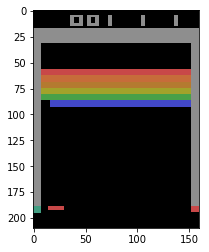

In [26]:
#taken from http://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
#env = gym.make('CartPole-v0')
env = gym.make('Breakout-v0')


# Run a demo of the environment
observation = env.reset()
cum_reward = 0
frames = []
for t in range(1000):
    # Render into buffer. 
    # You will still see the window.
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
        
#getting error with (close = True) parameter
plt.imshow(env.render(mode='rgb_array'))

Displays enviroment already record and in GIF form. Technically supposed to not open up on your computer, but have not fixed bug yet.


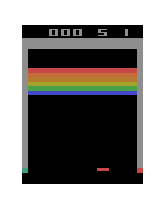
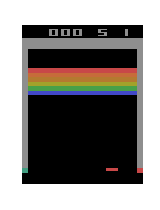
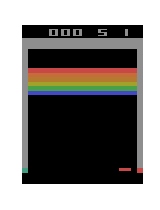
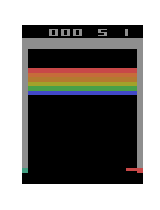
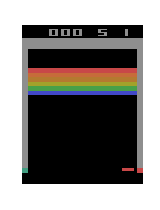
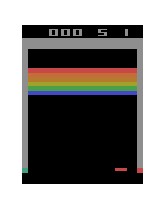
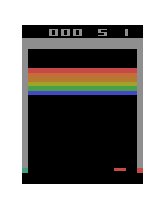
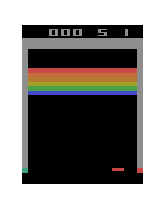
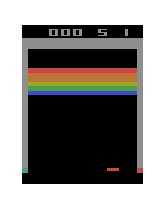
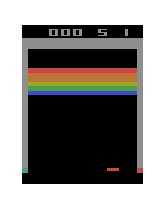
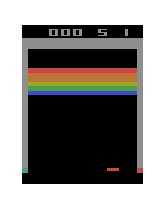
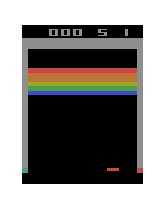
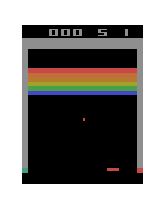
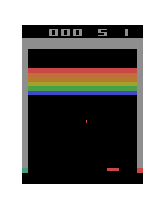
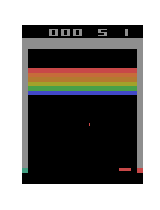
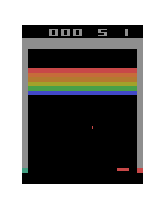
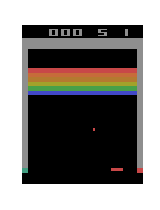
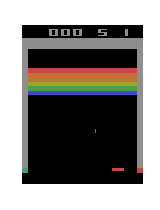
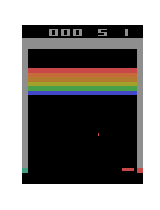
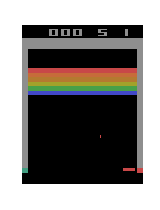
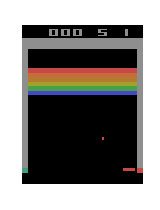
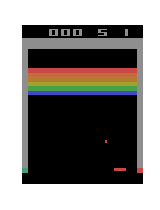
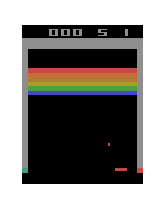
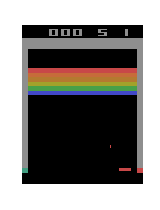
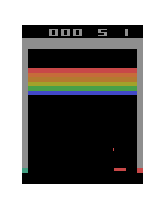
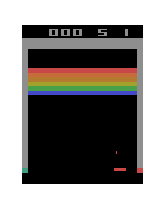
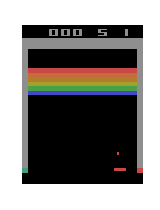
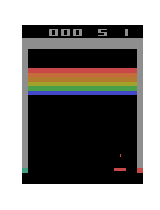
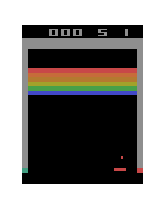
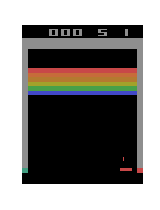
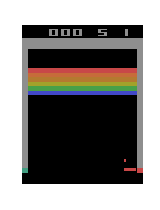
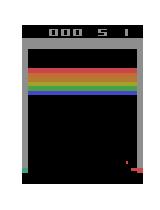
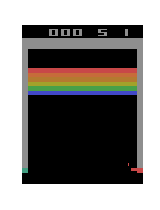
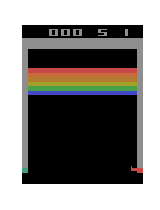
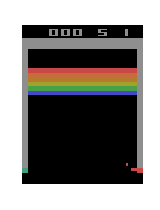
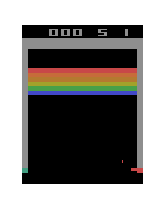
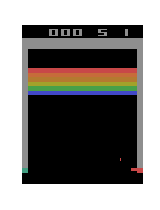
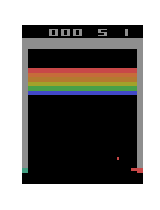
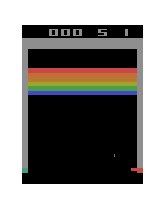
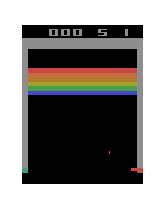
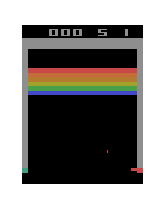
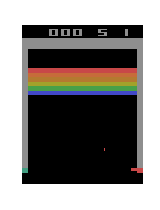
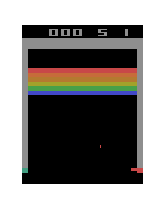
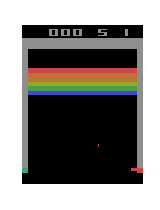
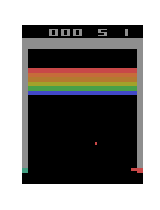
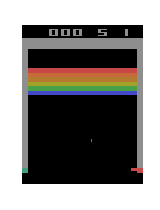
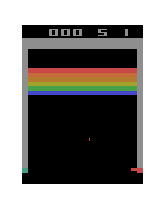
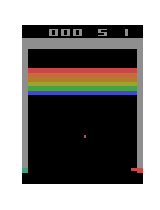
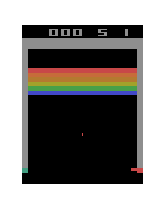
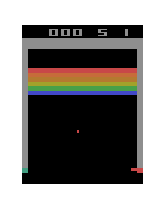
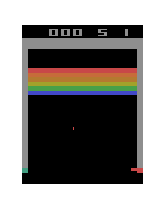
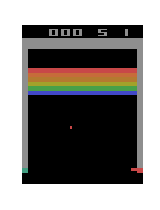
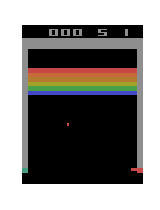
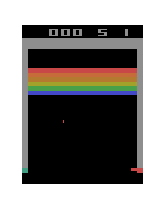
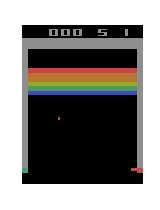
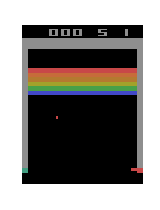
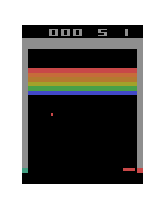
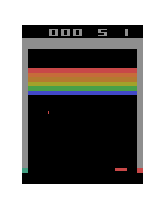
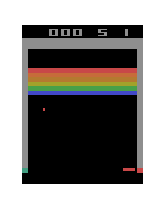
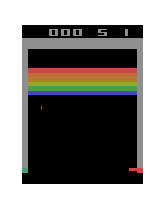
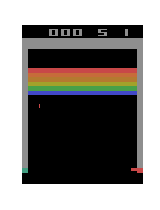
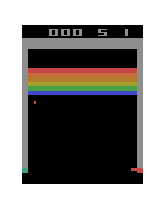
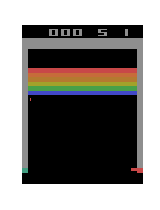
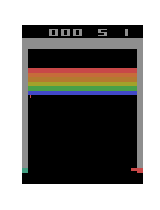
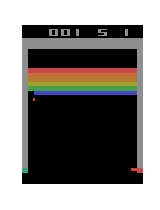
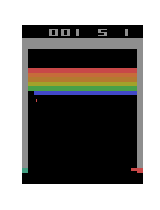
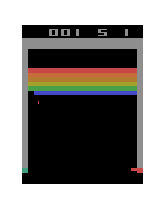
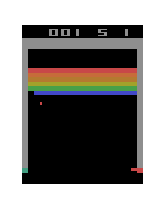
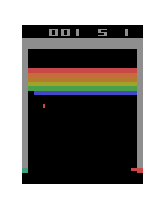
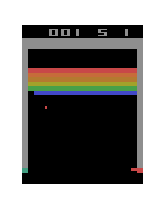
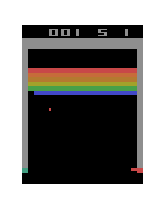
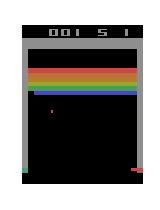
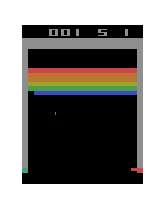
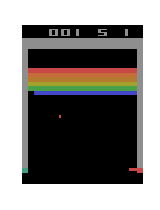
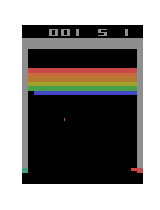
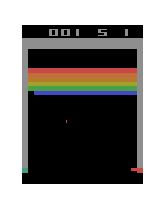
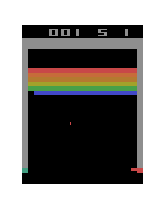
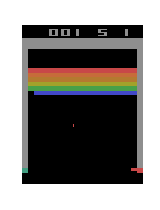
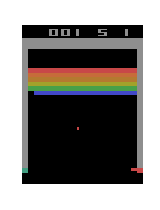
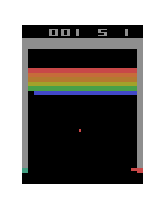
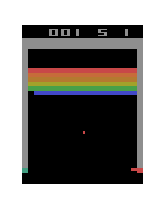
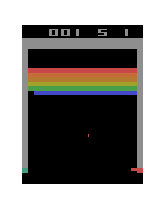
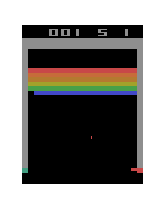
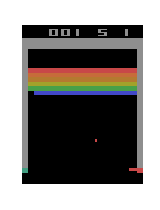
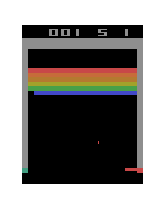
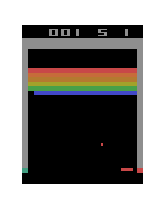
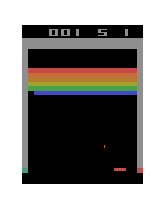
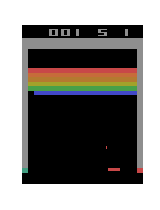
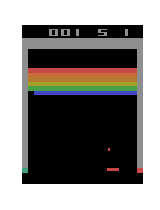
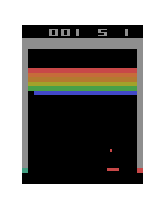
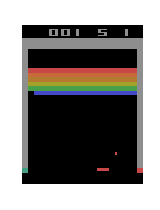
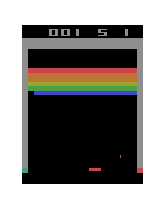
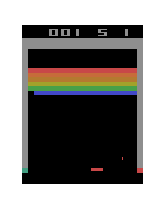
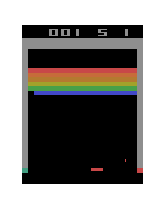
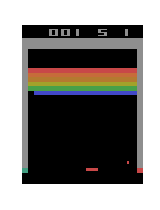
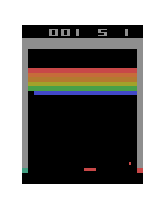
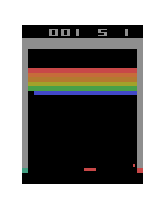
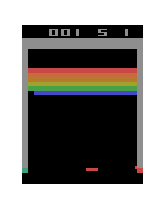
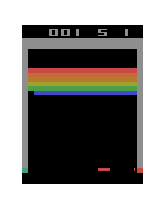
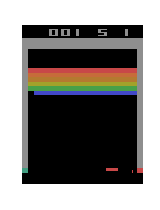
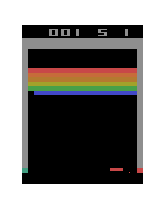
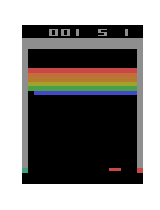
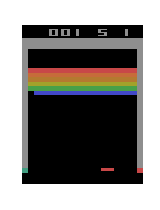
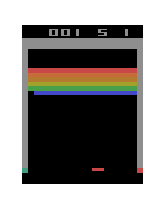
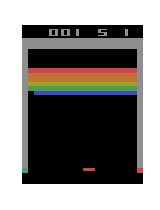
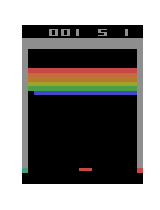
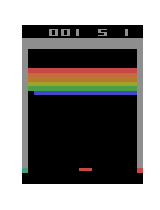
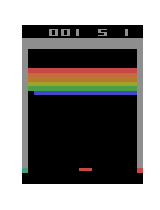
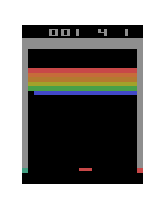
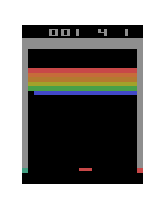
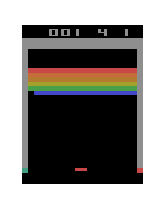
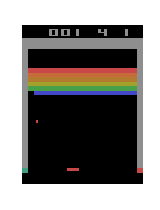
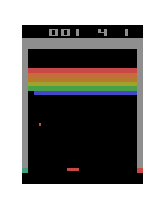
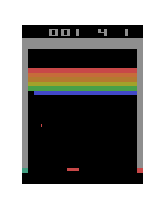
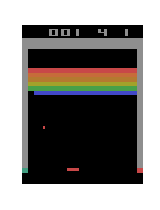
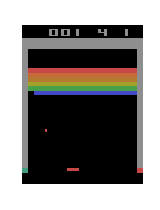
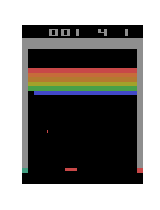
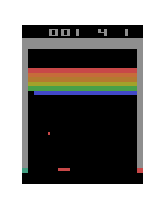
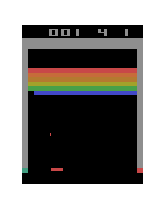
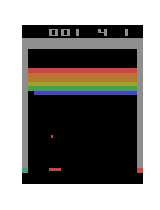
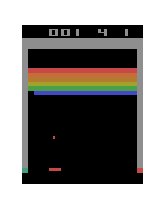
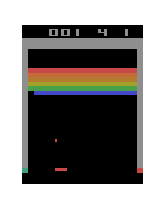
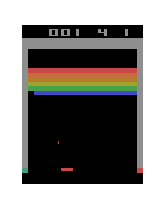
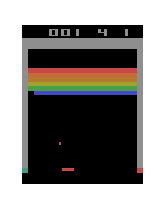
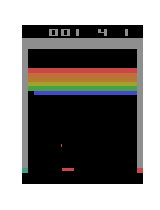
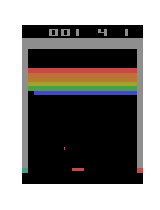
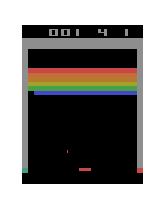
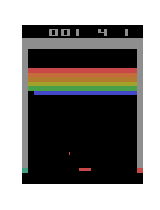
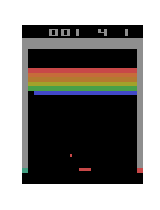
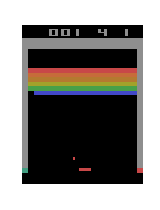
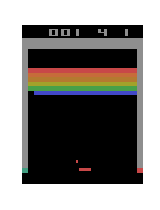
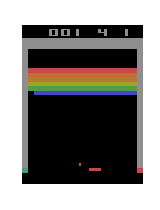
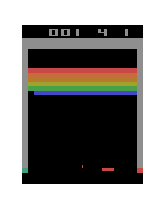
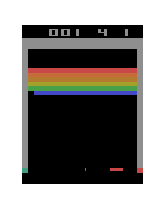
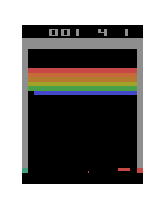
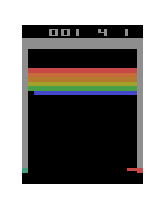
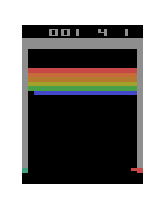
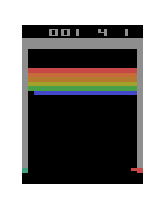
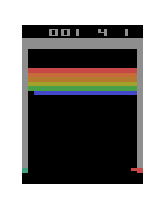
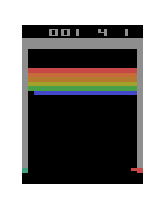
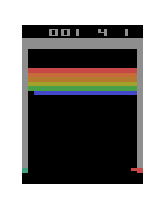
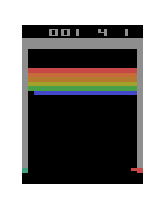
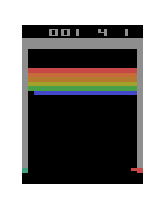
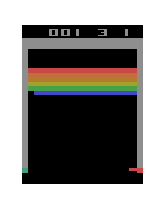
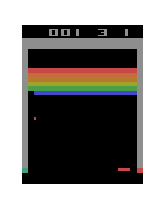
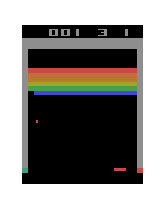
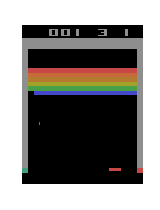
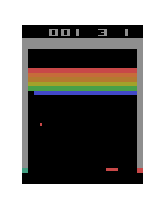
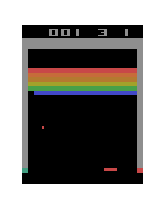
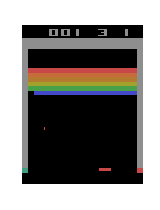
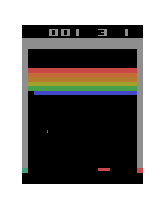
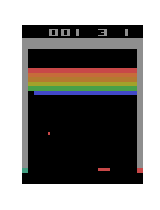
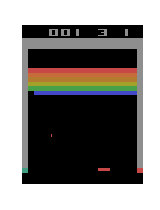
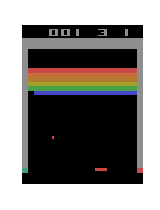
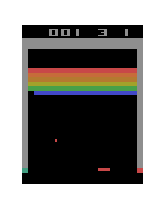
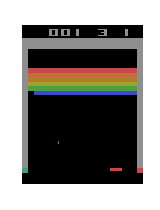
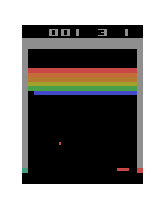
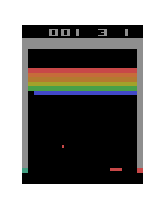
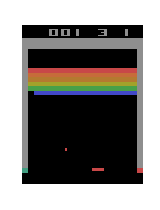
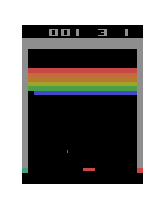
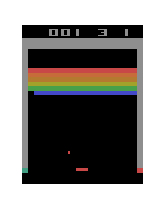
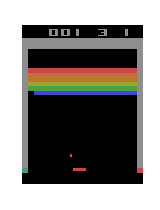
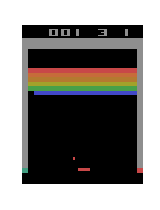
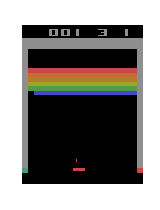
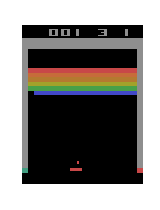
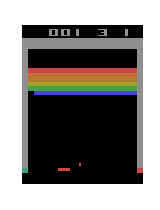
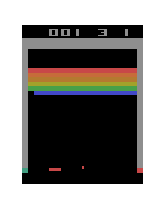
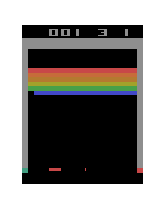
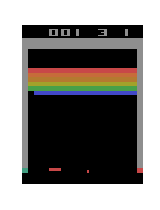
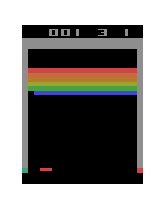
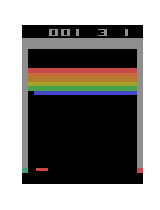
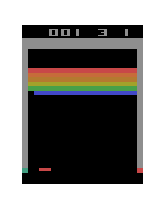
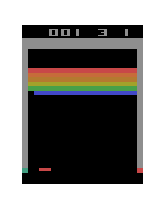
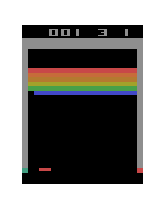
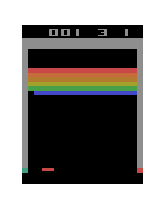
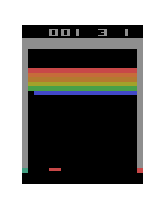
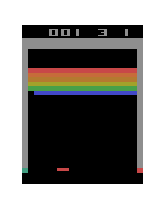
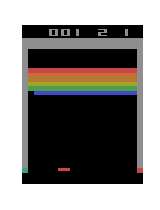
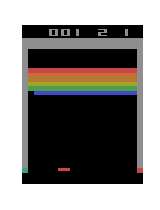
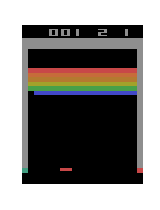
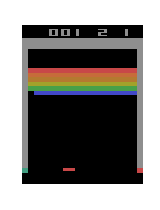
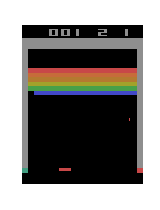
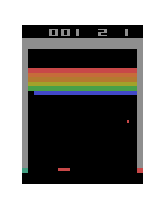
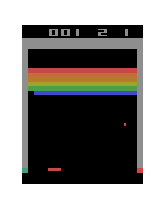
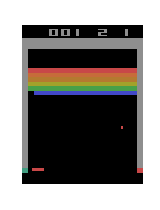
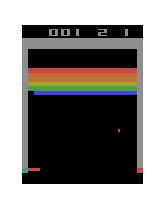
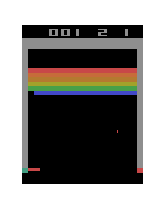
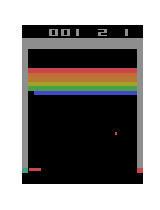
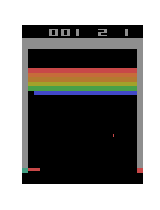
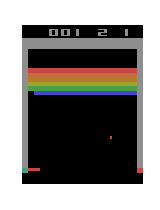
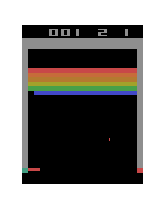
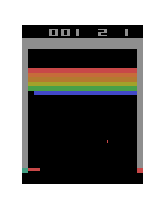
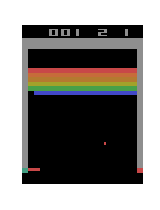
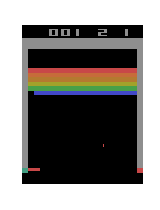
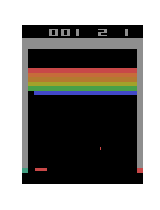
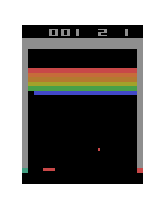
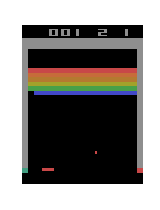
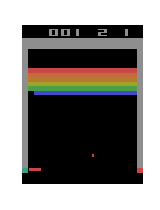
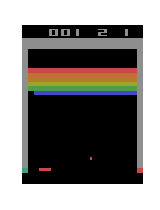
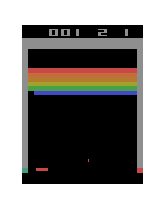
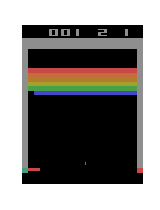
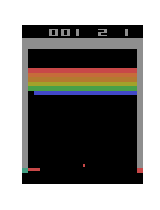
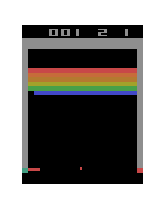
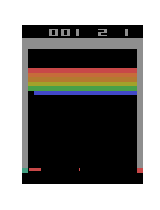
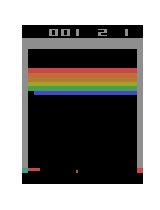
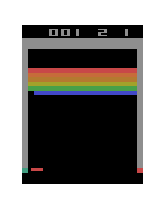
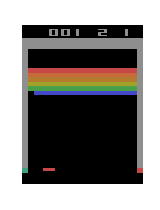
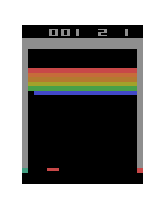
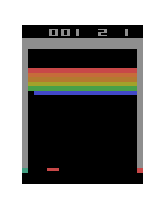
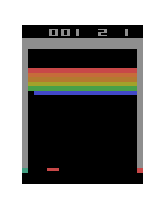
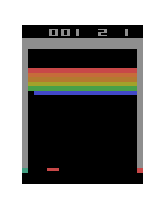
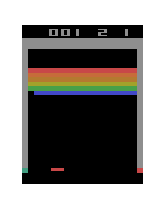
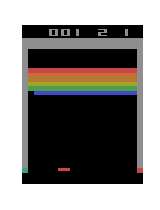
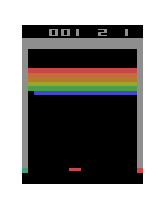
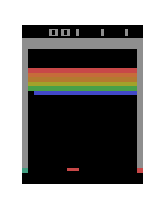
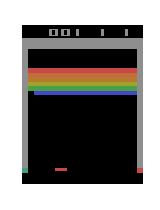
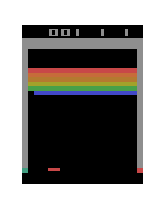
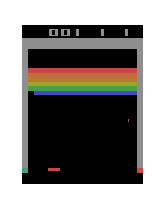
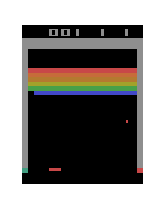
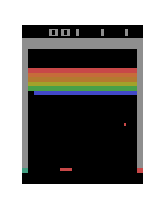
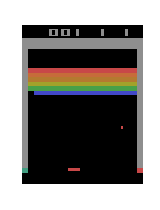
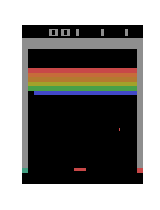
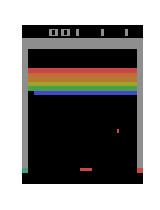
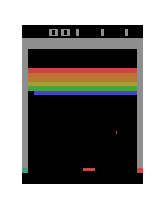
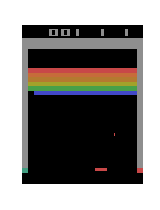
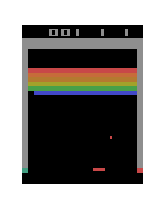
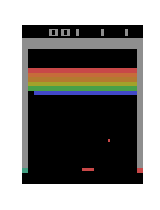
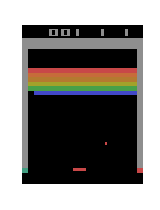
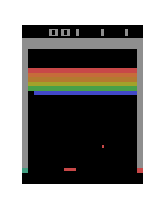
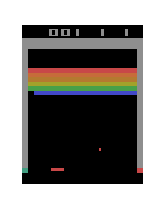
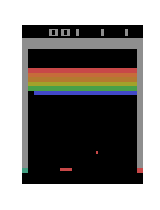
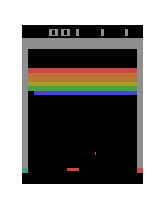
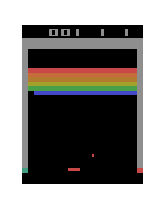
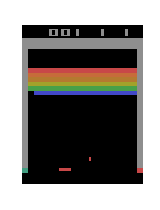
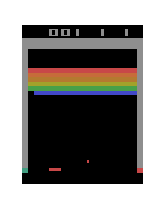
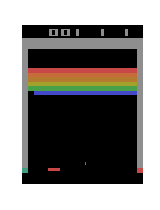
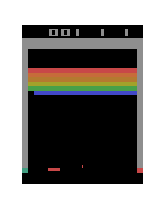
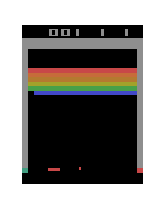
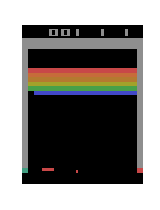
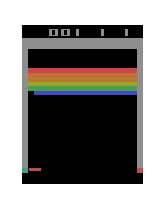
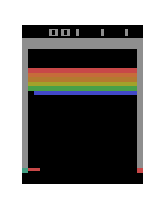
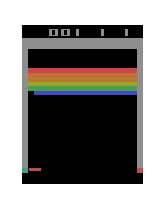
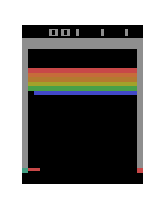
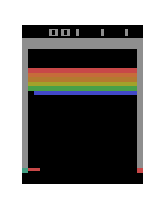
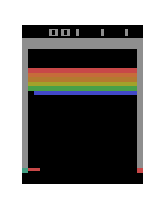
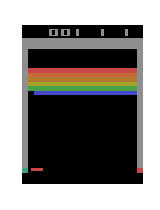
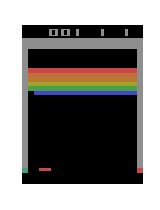

In [27]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

display_frames_as_gif(frames)

In [28]:
import gym
import numpy as np
import random

"""QLEARN CLASS NOT MY CODe"""
class QLearn:
    def __init__(self, actions, epsilon, alpha, gamma):
        self.q = {}
        self.epsilon = epsilon  # exploration constant
        self.alpha = alpha      # discount constant
        self.gamma = gamma      # discount factor
        self.actions = actions

    def load_q(self, new_q):
        self.q = new_q

    def getQ(self, state, action):
        return self.q.get(str(state)+ action, 0.0)

    def learnQ(self, state, action, reward, value):
        '''
        Q-learning:
            Q(s, a) += alpha * (reward(s,a) + max(Q(s') - Q(s,a))
        '''
        oldv = self.q.get(str(state) + action, None)
        if oldv is None:
            self.q[str(state)+ action] = reward
        else:
            self.q[str(state)+ action] = oldv + self.alpha * (value - oldv)

    def chooseAction(self, state, return_q=False):
        q = [self.getQ(state, a) for a in self.actions]
        maxQ = max(q)

        if random.random() < self.epsilon:
            minQ = min(q); mag = max(abs(minQ), abs(maxQ))
            # add random values to all the actions, recalculate maxQ
            q = [q[i] + random.random() * mag - .5 * mag for i in range(len(self.actions))]
            maxQ = max(q)

        count = q.count(maxQ)
        # In case there're several state-action max values
        # we select a random one among them
        if count > 1:
            best = [i for i in range(len(self.actions)) if q[i] == maxQ]
            i = random.choice(best)
        else:
            i = q.index(maxQ)

        action = self.actions[i]
        if return_q: # if they want it, give it!
            return action, q
        return action

    def learn(self, state1, action1, reward, state2):
        maxqnew = max([self.getQ(state2, a) for a in self.actions])
        self.learnQ(state1, action1, reward, reward + self.gamma*maxqnew)

EPSILON=.5
ALPHA=.4
GAMMA=1

env = gym.make("BinaryCarRacing-v0")
env.reset()

action_list = [
    "steer_left",
    "steer_right",
    "gas_on",
    "gas_off",
    "brake_on",
    "brake_off"
]

def assign_val(x, index, val):
    x[index] = val
    return x

action_effects = {
    "steer_left":     lambda x: assign_val(x, 0, -1),
    "steer_straight": lambda x: assign_val(x, 0, 0),
    "steer_right":    lambda x: assign_val(x, 0, 1),
    "gas_on":         lambda x: assign_val(x, 1, 1),
    "gas_off":        lambda x: assign_val(x, 1, 0),
    "brake_on":       lambda x: assign_val(x, 2, 1),
    "brake_off":      lambda x: assign_val(x, 2, 0)
}

agent = QLearn(
    actions=action_list,
    epsilon=EPSILON,
    alpha=ALPHA,
    gamma=GAMMA
)

max_reading = 0

import math
def convert_to_discrete(reading, max_reading):
    if reading == 0 or reading == -1:
        return -1
    return math.floor(reading/max_reading * 5)

for iteration in range(100):
    action = np.array([0, 0, 0])
    action_chosen = None
    state = None
    step_reward = None
    done = False
    while not done:
        new_state, step_reward, done, _ = env.step(action)
        for reading in new_state:
            if reading > max_reading:
                max_reading = reading
        #new_state = list(map(lambda x: convert_to_discrete(x, max_reading), new_state))
        new_state = [convert_to_discrete(x, max_reading) for x in new_state]
        if state:
            agent.learn(state, action_chosen, step_reward, new_state)
        action_chosen = agent.chooseAction(new_state)
        action = action_effects[action_chosen](action)
        state = new_state
        if iteration % 10 == 0:
            env.render()
    env.reset()

import json
with open("./agent_q.agent", "w+") as f:
    f.write(json.dumps(agent.q))

NotImplementedError: abstract

# DQN (Deep Q Network)

In 2013, researchers at DeepMind presented one of the first models combining reinforcement learning with a convolutional neural network. Using a neural network, they approximated the Q function, with the state being pixels from the Atari 2600. This model was able to outperform all previous approaches on playing six of the games, and outperforms human experts on three of the games.


## Network Training
Frames are cropped to 84x84 regions that capture the game playing area and converted to grayscale, then 4 frames are stacked to capture movement at each step. The resulting stack of frames is used as the state at each step.

The network is then trained with RMSprop on the mean squared error of $Q(s)$ computed from the network and the actual reward received.  10,000,000 frames were used to train for each game.

## Experience Replay
Each state, action, reward and new state (known as transitions) are saved in a "replay memory", and at each step, a random sample of transitions are taken to train the network with. This is known as experience replay, and has a few benefits, including greater data efficiency (each state transition is used more than once) and more efficient learning (randomly sampled states are less correlated than sequential states). This also avoids oscillation and divergence, because the current state is not entirely dependent on the model's parameters at that time. The replay memory can holds the last 1,000,000 frames.

## Target Network
The authors of DQN followed up with another technique in which 2 separate Q networks are used, one to train, and one to calculate the target value during training. Every 10,000 steps, the parameters from the trained network are copied over to the target network. This also avoids oscillation and divergence.


In [1]:
import math
import random
import time

from keras.layers import Input, Conv2D, Dense, Flatten
from keras.models import Model, load_model
import numpy as np
from scipy.misc import imresize


class DQNAgent:
    def __init__(self, input_shape, n_outputs, train=True, model_path=None,
                       max_epsilon=1.0, min_epsilon=0.1, gamma=0.99,
                       lambda_=0.001, mem_size=5e5,
                       batch_size=32, update_target_freq=1000):

        self.input_shape = input_shape
        self.n_outputs = n_outputs

        if train:
            # network we are training
            self.nn = self._create_nn()

            # network we are using to predict targets in Q calculation
            self.nn_ = self._create_nn()
            self.epsilon = max_epsilon
        else:
            self.nn = load_model(model_path)
            self.epsilon = min_epsilon

        self.memory = []

        self.mem_size = mem_size
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.gamma = gamma
        self.lambda_ = lambda_
        self.batch_size = batch_size
        self.update_target_freq = update_target_freq

        self.episode = 0
        self.steps = 0

    def _create_nn(self):
        inputs = Input(shape=self.input_shape)
        net = Conv2D(16, 8, strides=4, activation='relu')(inputs)
        net = Conv2D(32, 4, strides=2, activation='relu')(net)
        net = Flatten()(net)
        net = Dense(256, activation='relu')(net)
        outputs = Dense(self.n_outputs, activation='linear')(net)

        model = Model(inputs, outputs)
        model.compile('rmsprop', 'mse')
        return model

    def _get_batch(self):
        n = min(len(self.memory), self.batch_size)
        return random.sample(self.memory, n)

    def _decrease_epsilon(self):
        self.epsilon = self.min_epsilon + (self.max_epsilon - self.min_epsilon)\
                       * math.exp(-self.lambda_ * self.steps)

    def _update_target_nn(self):
        self.nn_.set_weights(self.nn.get_weights())

    def action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.n_outputs - 1)
        else:
            if state.ndim == 3:
                state = np.expand_dims(state, axis=0)
            return np.argmax(self.nn.predict(state))

    def observe(self, sample):
        """
        sample should consist of state, action, reward, state_
        """
        if len(self.memory) > self.mem_size:
            self.memory.pop(0)
        self.memory.append(sample)

        self.steps += 1
        self._decrease_epsilon()

        if self.steps % self.update_target_freq == 0:
            self._update_target_nn()


    def replay(self):
        batch = self._get_batch()

        X = []
        y = []

        for s, a, r, s_ in batch:
            X.append(s)
            y.append(self.Q(s).ravel())

            if s_ is None:
                y[-1][a] = r
            else:
                y[-1][a] = r + self.gamma*np.amax(self.Q(s_, target=True))

        X = np.array(X)
        y = np.array(y)
        self.nn.fit(X, y, epochs=1, verbose=0)


    def Q(self, state, target=False):
        if state.ndim == 3:
            state = np.expand_dims(state, axis=0)

        if target:
            return self.nn_.predict(state)
        else:
            return self.nn.predict(state)




/home/justin/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Evaluating our DQN

This DQN was trained for about 50,000 episodes. Looking at the plot below, it seems to have fallen into a local optimum after about 10,000 episodes. Some additional tweaking of the model should be done to improve performance, but we can still see that the model learned something.

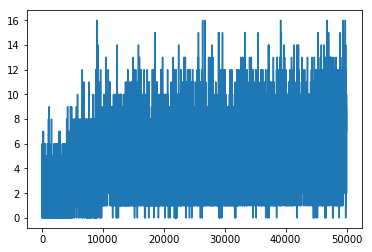

In [2]:
import matplotlib.pyplot as plt

rewards = []
with open('results/rewards.txt') as f:
    for line in f:
        rewards.append(float(line.rstrip()))
        
plt.plot(range(len(rewards)), rewards)
plt.show()

In [4]:
import gym

NUM_EPISODES = 1000
RENDER = True
TRAIN = False
MODEL_PATH = 'models/breakout.h5'

def to_gray(rgb):
    gray = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    return gray


def process(frame):
    frame = imresize(frame, (110, 84, 3))
    frame = to_gray(frame)
    frame = frame[20:104]
    return frame


env = gym.make('Breakout-v0')
"""
Actions in Breakout:
    0 - Noop
    1 - Fire (start game)
    2 - Right
    3 - Left

State: 210x160x3 Image
"""
dqn_agent = DQNAgent((84, 84, 4), 4, train=TRAIN, model_path=MODEL_PATH)

frames = []
frame = env.reset()
frame = process(frame)

# Fill frame history with initial state
frames += [frame, frame, frame, frame]
state = np.stack(frames, axis=2)

done = False
total_reward = 0
while not done:
    action = dqn_agent.action(state)
    frame, reward, done, info = env.step(action)
    total_reward += reward

    if RENDER:
        env.render()

        # If playing, sleep so humans can watch
        if not TRAIN:
            time.sleep(1/20)

    frame = process(frame)
    frames.pop()
    frames.append(frame)
    state_ = np.stack(frames, axis=2)
    state = state_

print('Reward: %d' % total_reward)
env.close()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Reward: 2


It looks like the model learned to keep the paddle in the corners, because the ball seems to be directed in the corners most of the time. The model also seemed to learned to come out of the corner into the middle as the ball bounces back, but the model's aim seems to be very poor.

# Policy Gradient Methods

DQN is a value based method, where Q approximates a value, such as the reward, and the policy is implicit,
with actions selected using a greedy policy.

Another type of algorithms exist known as policy gradient methods, which given a state, return the approximate "best" action, so the policy is explicit. The policy is parameterized, and we can do gradient descent into the direction that improves it. This can sometimes be easier to approximate than value functions, is needed for continuous action spaces and environments and can learn stochastic policies.

## Policy Objective Functions

The quality of the policy can be measured with either the start value, average value, or average reward per time-step. This measure gives us the objective function, $J(\theta)$ that we want to optimize.

## Policy Gradient Theorem

The policy gradient theorem defines the gradient of the policy objective function:

For a differentiable policy $\pi_\theta(s, a)$, and a policy objective function $J(\theta)$, the policy gradient
is
$$\nabla_\theta J(\theta) = \mathbf{E}_{\pi_\theta} [ \nabla_\theta \log \pi_\theta(s, a) Q^{\pi_\theta}(s, a) ]$$

We can use this gradient to move the policy to the direction of more reward:

$$
\theta \leftarrow \theta + \alpha \nabla_\theta J(\theta) 
$$

## Monte-Carlo Policy Gradient (REINFORCE)

In the above policy gradient, we can use the return $v_t$ (discounted sum of rewards) as an unbiased sample
of $Q^{\pi_\theta}(s, a)$:

$$\Delta \theta_t = \alpha \nabla_\theta \log \pi_\theta(s, a) v_t$$

The REINFORCE algorithm is then:

>Initialize $\theta$ arbitrarily
>
> For each episode {$s_1$, $a_1$, $r_2$ , ..., $s_{T−1}$, $a_{T−1}$, $r_T$ } ~ $\pi_\theta$ do
> 
>> for $t = 1$ to $T − 1$ do
>>    
>>>  $\theta \leftarrow \theta + \alpha \nabla_\theta \log \pi_\theta(s, a) v_t$
>>    
>>  end for
>     
> end for

So in episodic environments, instead of updating our model with each step, we update the model at the end of each episode. This can help with the credit assignment problem.


# Deep REINFORCE Demo

We will look at a simple example of using the REINFORCE algorithm to learn to play the Atari game Pong.

In this example, we create a neural network that given the state will give the probabilities of actions to take at the state. 

At each step of an episode, an action is selected from the probabilties given by the model. Then the observations, rewards and $\nabla_\theta \log \pi_\theta(s, a)$ are saved. At the end of each episode, the parameters of the policy are updated according to the REINFORCE algorithm above.

This is done by feeding the network the observation at time $t$, and training the binary crossentropy loss between the prediction ($\pi_\theta(s_t, a_t)$) and $\pi_\theta(s_t, a_t) + \alpha \log \pi_\theta(s, a)$. This allows Keras to handle the backpropagation for us (see http://karpathy.github.io/2016/05/31/rl/ for manual backpropagation). 

In [5]:
"""
Code adapted from:
http://karpathy.github.io/2016/05/31/rl/
https://gist.github.com/karpathy/a4166c7fe253700972fcbc77e4ea32c5
https://github.com/keon/policy-gradient
"""

import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D


class PGAgent:
    def __init__(self, state_size):
        self.state_size = state_size
        self.gamma = 0.99
        self.learning_rate = 0.001
        self.states = []
        self.gradients = []
        self.rewards = []
        self.probs = []
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Reshape((1, 80, 80), input_shape=(self.state_size,)))
        model.add(Convolution2D(32, 6, 6, subsample=(3, 3), border_mode='same',
                                activation='relu', init='he_uniform'))
        model.add(Flatten())
        model.add(Dense(64, activation='relu', init='he_uniform'))
        model.add(Dense(32, activation='relu', init='he_uniform'))
        model.add(Dense(1, activation='sigmoid'))
        opt = Adam(lr=self.learning_rate)
        model.compile(loss='binary_crossentropy', optimizer=opt)
        return model

    def remember(self, state, action, prob, reward):
        """ save grads, states, rewards """

        # a "fake label"
        y = 1 if action == 2 else 0

        # encourages action taken to be taken
        self.gradients.append(y - prob)

        self.states.append(state)
        self.rewards.append(reward)

    def act(self, state):
        state = state.reshape([1, state.shape[0]])
        prob = self.model.predict(state).flatten()[0]
        self.probs.append(prob)

        # Choose up (2) or down (3)
        action = 2 if np.random.uniform() < prob else 3

        return action, prob

    def discount_rewards(self, rewards):
        """ take 1D float array of rewards and compute discounted reward """
        discounted_rewards = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(0, rewards.size)):
            if rewards[t] != 0:
                running_add = 0
            running_add = running_add * self.gamma + rewards[t]
            discounted_rewards[t] = running_add
        return discounted_rewards

    def train(self):
        gradients = np.vstack(self.gradients)

        # compute discounted reward backwards through time
        # and standardize to be unit normal
        rewards = np.vstack(self.rewards)
        rewards = self.discount_rewards(rewards)
        rewards = rewards / np.std(rewards - np.mean(rewards))

        # multiply gradient with reward (grad log pi * v_t)
        gradients *= rewards

        # backprop with states and gradients
        # (theta <- theta + alpha * grad log pi * v_t)
        X = np.squeeze(np.vstack([self.states]))
        Y = self.probs + self.learning_rate * np.squeeze(np.vstack([gradients]))
        self.model.train_on_batch(X, Y)

        # reset buffers
        self.states, self.probs, self.gradients, self.rewards = [], [], [], []

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

def preprocess(I):
    """ prepro 210x160x3 uint8 frame into 6400 (80x80) 1D float vector """
    I = I[35:195]           # crop
    I = I[::2, ::2, 0]      # downsample by factor of 2
    I[I == 144] = 0         # erase background (type 1)
    I[I == 109] = 0         # erase background (type 2)
    I[I != 0] = 1           # set everything else to 1 (paddles, ball, etc)
    return I.astype(np.float).ravel()

def train():
    env = gym.make("Pong-v0")
    state = env.reset()
    prev_x = None
    score = 0
    episode = 0

    scores = []
    state_size = 80 * 80
    agent = PGAgent(state_size)
    #agent.load('models/pong.h5')
    while True:
        cur_x = preprocess(state)
        x = cur_x - prev_x if prev_x is not None else np.zeros(state_size)
        prev_x = cur_x

        # Choose action with prob, and get probabilities of all actions
        action, prob = agent.act(x)
        state, reward, done, info = env.step(action)
        score += reward
        agent.remember(x, action, prob, reward)

        # Training after episode done
        if done:
            episode += 1
            agent.train()
            print('Episode: %d - Score: %f.' % (episode, score))
            scores.append(score)
            score = 0
            state = env.reset()
            prev_x = None
            if episode > 1 and episode % 10 == 0:
                agent.save('models/pong.h5')
                np.save('scores.npy', scores)

    env.close()

## Evaluating our policy gradient implementation

This implementation was trained for ~11K episodes. From the plot below we can see that it learned something, but may have also gotten stuck in a local optima. 


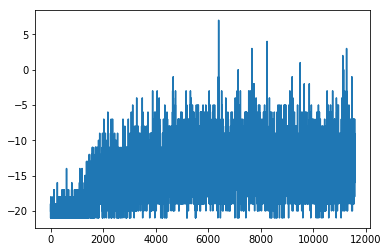

In [6]:
import matplotlib.pyplot as plt
scores = np.load('results/pg-scores.npy')

plt.plot(range(len(scores)), scores)
plt.show()

In [7]:
import time
env = gym.make("Pong-v0")
state = env.reset()
prev_x = None
state_size = 80 * 80
agent = PGAgent(state_size)
agent.load('models/pong.h5')
done = False
while not done:
    env.render()
    time.sleep(1/20)

    cur_x = preprocess(state)
    x = cur_x - prev_x if prev_x is not None else np.zeros(state_size)
    prev_x = cur_x

    action, prob = agent.act(x)
    state, reward, done, info = env.step(action)

env.close()


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (6, 6), activation="relu", strides=(3, 3), padding="same", kernel_initializer="he_uniform")`
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="he_uniform")`
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="he_uniform")`


We can see that the model learned to hit the ball, but still does not outperform the computer player. One thing of interest is that our model's movements are somewhat erratic. This may be a result of limiting the possible actions to up or down for the model, and excluding the no-op action. Including the no-op action may add some stability.

# More Policy Gradient Methods

## Actor Critic Methods
The Monte Carlo REINFORCE algorithm can suffer from high variance. One method of reducing this variance is using a critic to estimate a value function like $Q$. The critic approximates the value function and is used in place of $v_t$ in the REINFORCE algorithm above:

$$\Delta \theta_t = \alpha \nabla_\theta \log \pi_\theta(s, a) Q_w(s, a)$$

The critic learns to approximate $Q$ as the actor simulataneously learns the policy.

In place of $Q(s, a)$ (which gives the total reward from taking $a_t$ at $s_t$), the critic can estimate the advantage function $A(s, a) = Q(s, a) - V(s)$, where $V(s)$ givens the total reward from $s_t$. This is done with two function approximators, one for $Q$ and one for $V$, but can be done with just approximate $V$ and using $V$ to approximate $Q$. The advantage function $A(s, a)$ is essentially subtracting $V$ from $Q$ to use $V$ as a baseline.

## Natural Policy Gradient / Trust Region Policy Optimization

TRPO is a popular policy gradient method, and usually the go-to for learning policies in continuous action spaces. It builds off of "natural" policy gradients, as opposed to "vanilla" policy gradients described in the methods above. The problem this tries to solve is that the gradient is not scaled the same way in different directions, so the gradient steps on some parameters change the policy to different degrees than others. This can lead to slow convergence.

Natural policy gradient methods rescale the gradient, so the ascent step changes the probabilities in a fixed amount rather than the parameters. This is done by constraining the gradient ascent step by using a divergence measure such of the updated policy and the current policy:

$$
\theta'  \leftarrow \text{arg max}_{\theta'} (\theta' - \theta)^T \nabla_\theta J(\theta) \text{ s.t. } D(\pi_{\theta'}, \pi_{\theta}) \leq \epsilon
$$

Usually this divergence measure is the KL-divergence, which can be estimated and computed with samples using the Fisher-information matrix:

$$
D_{\text{KL}} (\pi_{\theta'} || \pi_{\theta}) = E_{\pi_{\theta'}}  [ \log \pi_\theta - \log \pi_{\theta'} ]
$$

$$
D_{\text{KL}} (\pi_{\theta'} \pi_{\theta}) \approx (\theta' - \theta)^T \textbf{F}(\theta' - \theta)
$$

$$
\textbf{F} = E_{\pi_{\theta}}  [ \log \pi_\theta (a | s) - \log \pi_\theta (a | s)^T  ]
$$

Now we just multiply our gradient step by the inverse of the Fisher-information matrix:

$$
\theta \leftarrow \theta + \alpha \textbf{F}^{-1} \nabla_\theta J(\theta) 
$$

With the natural gradient, we pick $\alpha$, but TRPO can solve for the optimal $\alpha$ while solving $\textbf{F}^{-1} \nabla_\theta J(\theta)$, which gives us an adaptive step size.

## Deterministic Policy Gradients / Deep Deterministic Policy Gradients
In the above methods, the policy gradient is stochastic, with actions sampled from a distribution with some mean and variance parameterized by the policy. With a deterministic policy gradient, we reduce the variance to 0, and take the gradients of the mean. This gives a policy directly maps a state to an action. 

The deterministic policy gradient only integrates over the state space, while the stochastic policy gradient integrates over state and action spaces, requiring more samples to compute. Because a determinisitic policy may hinder exploration, an actor-critic method is used to learn the policy. The model approximates the action-value function $Q$, and updates the the policy parameters in the direction of the action-value gradient.

In the Deep DPG, both the policy and action-value function are approximated with neural networks, and techniques from DQN are used to stabilize training such as target networks and replay buffers.

TODO: more math?

Example?: http://pemami4911.github.io/blog/2016/08/21/ddpg-rl.html


# World Models

Most environments have very high dimensions, for example the Atari games state space is 210x160x3. In our example we scaled this down to 80x80, but a method to scale this down even further is to use a variational autoencoder to encode the state into some lower dimensional latent space. This can also be combined with an RNN trained to output a gaussian mixture to predict future states. This technique is known as a "world model", and is inspired by the way humans create their own mental model of their surroundings.  

See the interactive paper published by David Ha and Jürgen Schmidhuber here: https://worldmodels.github.io/

For an implementation and demo: https://github.com/8000net/world-models

## References

Image #1: http://slideplayer.com/slide/2342696/

Image #2: Title Book

Image #3: https://www.analyticsvidhya.com/blog/2017/01/introduction-to-reinforcement-learning-implementation/

Youtube: https://youtu.be/ggqnxyjaKe4

Youtube: https://youtu.be/3T5eCou2erg

Code/Content: https://github.com/dennybritz/reinforcement-learning

Code/Content #2:https://github.com/vmayoral/basic_reinforcement_learning

Code/Content #3:https://www.oreilly.com/learning/introduction-to-reinforcement-learning-and-openai-gym

DQN: https://docs.google.com/viewer?url=https%3A%2F%2Fwww.cs.toronto.edu%2F~vmnih%2Fdocs%2Fdqn.pdf

DQN (Nature): https://docs.google.com/viewer?url=https%3A%2F%2Fstorage.googleapis.com%2Fdeepmind-media%2Fdqn%2FDQNNaturePaper.pdf

https://jaromiru.com/2016/09/27/lets-make-a-dqn-theory/

Policy Gradient Info: https://github.com/dennybritz/reinforcement-learning/tree/master/PolicyGradient

Policy Gradient Slides: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/pg.pdf

Simple Policy Gradient with Neural Network Example: http://karpathy.github.io/2016/05/31/rl/

ICML 2017 Deep RL Slides: https://sites.google.com/view/icml17deeprl

University of Toronto TRPO slides: http://www.cs.toronto.edu/~tingwuwang/trpo.pdf

DPG: http://proceedings.mlr.press/v32/silver14.pdf

DDPG: http://pemami4911.github.io/blog/2016/08/21/ddpg-rl.html